# Static portfolio optimization

## Mean variance criterion

In [31]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html
from scipy.optimize import minimize
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")
import warnings
warnings.filterwarnings("ignore")

In [25]:
list_tickers = ["META", "NFLX", "TSLA"]
database = yf.download(list_tickers)
database

[*********************100%***********************]  3 of 3 completed


Price                       Adj Close                               Close  \
Ticker                           META        NFLX        TSLA        META   
Date                                                                        
2002-05-23 00:00:00+00:00         NaN    1.196429         NaN         NaN   
2002-05-24 00:00:00+00:00         NaN    1.210000         NaN         NaN   
2002-05-28 00:00:00+00:00         NaN    1.157143         NaN         NaN   
2002-05-29 00:00:00+00:00         NaN    1.103571         NaN         NaN   
2002-05-30 00:00:00+00:00         NaN    1.071429         NaN         NaN   
...                               ...         ...         ...         ...   
2024-09-11 00:00:00+00:00  511.342163  681.469971  228.130005  511.829987   
2024-09-12 00:00:00+00:00  525.099060  686.799988  229.809998  525.599976   
2024-09-13 00:00:00+00:00  524.119995  697.059998  230.289993  524.619995   
2024-09-16 00:00:00+00:00  533.280029  696.500000  226.779999  533.280029   
2024-09-17 00:00:00+00:00  536.320007  706.909973  227.869995  536.320007   

Price                                                    High              \
Ticker                           NFLX        TSLA        META        NFLX   
Date                                                                        
2002-05-23 00:00:00+00:00    1.196429         NaN         NaN    1.242857   
2002-05-24 00:00:00+00:00    1.210000         NaN         NaN    1.225000   
2002-05-28 00:00:00+00:00    1.157143         NaN         NaN    1.232143   
2002-05-29 00:00:00+00:00    1.103571         NaN         NaN    1.164286   
2002-05-30 00:00:00+00:00    1.071429         NaN         NaN    1.107857   
...                               ...         ...         ...         ...   
2024-09-11 00:00:00+00:00  681.469971  228.130005  513.119995  682.969971   
2024-09-12 00:00:00+00:00  686.799988  229.809998  526.710022  694.880005   
2024-09-13 00:00:00+00:00  697.059998  230.289993  527.580017  699.640015   
2024-09-16 00:00:00+00:00  696.500000  226.779999  534.099976  703.020020   
2024-09-17 00:00:00+00:00  706.909973  227.869995  542.099976  707.630005   

Price                                         Low                          \
Ticker                           TSLA        META        NFLX        TSLA   
Date                                                                        
2002-05-23 00:00:00+00:00         NaN         NaN    1.145714         NaN   
2002-05-24 00:00:00+00:00         NaN         NaN    1.197143         NaN   
2002-05-28 00:00:00+00:00         NaN         NaN    1.157143         NaN   
2002-05-29 00:00:00+00:00         NaN         NaN    1.085714         NaN   
2002-05-30 00:00:00+00:00         NaN         NaN    1.071429         NaN   
...                               ...         ...         ...         ...   
2024-09-11 00:00:00+00:00  228.470001  495.600006  660.799988  216.800003   
2024-09-12 00:00:00+00:00  231.449997  515.219971  682.200012  223.830002   
2024-09-13 00:00:00+00:00  232.669998  517.109985  680.000000  226.320007   
2024-09-16 00:00:00+00:00  229.960007  517.400024  688.630005  223.529999   
2024-09-17 00:00:00+00:00  234.570007  530.570007  698.369995  226.550003   

Price                            Open                              Volume  \
Ticker                           META        NFLX        TSLA        META   
Date                                                                        
2002-05-23 00:00:00+00:00         NaN    1.156429         NaN         NaN   
2002-05-24 00:00:00+00:00         NaN    1.214286         NaN         NaN   
2002-05-28 00:00:00+00:00         NaN    1.213571         NaN         NaN   
2002-05-29 00:00:00+00:00         NaN    1.164286         NaN         NaN   
2002-05-30 00:00:00+00:00         NaN    1.107857         NaN         NaN   
...                               ...         ...         ...         ...   
2024-09-11 00:00:00+00:00  507.010010  677.460022  224.550003  1078250

In [26]:
# select only the djusted close prices
db = database["Adj Close"]
db

Ticker,META,NFLX,TSLA
Date,,,
2002-05-23 00:00:00+00:00,NaN,1.196429,NaN
2002-05-24 00:00:00+00:00,NaN,1.210000,NaN
2002-05-28 00:00:00+00:00,NaN,1.157143,NaN
2002-05-29 00:00:00+00:00,NaN,1.103571,NaN
2002-05-30 00:00:00+00:00,NaN,1.071429,NaN
...,...,...,...
2024-09-11 00:00:00+00:00,511.342163,681.469971,228.130005
2024-09-12 00:00:00+00:00,525.099060,686.799988,229.809998
2024-09-13 00:00:00+00:00,524.119995,697.059998,230.289993


In [27]:
# create returns and remove missing values
data = db.dropna().pct_change(1).dropna()
data

Ticker,META,NFLX,TSLA
Date,,,
2012-05-21 00:00:00+00:00,-0.109861,0.025443,0.043904
2012-05-22 00:00:00+00:00,-0.089039,-0.056175,0.070559
2012-05-23 00:00:00+00:00,0.032258,0.062029,0.007143
2012-05-24 00:00:00+00:00,0.032187,-0.022806,-0.023855
2012-05-25 00:00:00+00:00,-0.033909,-0.000711,-0.015522
...,...,...,...
2024-09-11 00:00:00+00:00,0.013946,0.011653,0.008666
2024-09-12 00:00:00+00:00,0.026904,0.007821,0.007364
2024-09-13 00:00:00+00:00,-0.001865,0.014939,0.002089


- The pct_change function in yfinance is used to calculate the percentage change between consecutive elements in a pandas DataFrame. This function is similar to the pct_change method in pandas, but specifically designed for financial data retrieved using yfinance. By default, it calculates the *percentage change between the current element and the previous element*.

In [32]:
# defining the mean-variance criterion function
def mean_variance_criterion(weights, data):
    """
    Calculate the utility of the indicator and find the best distribution among the three assets
    
    Returns and porfolio optimization criterion                                   
    
    Parameter: 
    weight (type ndarray numpy): the wheight for the portfolio
    data (type ndarray numpy): returns of stocks
    """

    print(f"weights: {weights}")
    print(f"data: {data}")
    
    # Parameters
    Lambda = 3
    W = 1
    Wbar = 1 + 0.25 / 100

    # Compute portfolio returns
    portfolio_return = np.multiply(data, np.transpose(weights))
    portfolio_return = portfolio_return.sum(axis=1)

    # Compute mean and volatility of the portfolio
    mean = np.mean(portfolio_return, axis=0)
    std = np.std(portfolio_return, axis=0)

    # Compute the criterion
    criterion = Wbar ** (1 - Lambda) / (1 + Lambda) + Wbar ** (-Lambda) \
                * W * mean - Lambda / 2 * Wbar ** (-1 - Lambda) * W ** 2 * std ** 2
    criterion = -criterion
    
    return criterion

In [33]:
# Define train and test sets
split = int(0.7 * len(data))
train_set = data.iloc[:split, :]
test_set = data.iloc[split:, :]

# Find the number of asset
n = data.shape[1]

# Initialisation weight value
x0 = np.ones(n)

# Optimization constraints problem
cons = ({'type': 'eq', 'fun': lambda x: sum(abs(x)) - 1})

# Set the bounds
Bounds = [(0, 1) for i in range(0, n)]

# Optimization problem solving
res_MV = minimize(mean_variance_criterion, x0, method="SLSQP",
                  args=(train_set), bounds=Bounds,
                  constraints=cons, options={'disp': True})

# Result for computations
X_MV = res_MV.x

weights: [1. 1. 1.]
data: Ticker                         META      NFLX      TSLA
Date                                                   
2012-05-21 00:00:00+00:00 -0.109861  0.025443  0.043904
2012-05-22 00:00:00+00:00 -0.089039 -0.056175  0.070559
2012-05-23 00:00:00+00:00  0.032258  0.062029  0.007143
2012-05-24 00:00:00+00:00  0.032187 -0.022806 -0.023855
2012-05-25 00:00:00+00:00 -0.033909 -0.000711 -0.015522
...                             ...       ...       ...
2020-12-28 00:00:00+00:00  0.035901  0.010020  0.002901
2020-12-29 00:00:00+00:00 -0.000794  0.022634  0.003466
2020-12-30 00:00:00+00:00 -0.017740 -0.011830  0.043229
2020-12-31 00:00:00+00:00  0.004745  0.030767  0.015674
2021-01-04 00:00:00+00:00 -0.015449 -0.033048  0.034152

[2170 rows x 3 columns]
weights: [0.99999999 1.         1.        ]
data: Ticker                         META      NFLX      TSLA
Date                                                   
2012-05-21 00:00:00+00:00 -0.109861  0.025443  0.043904
201

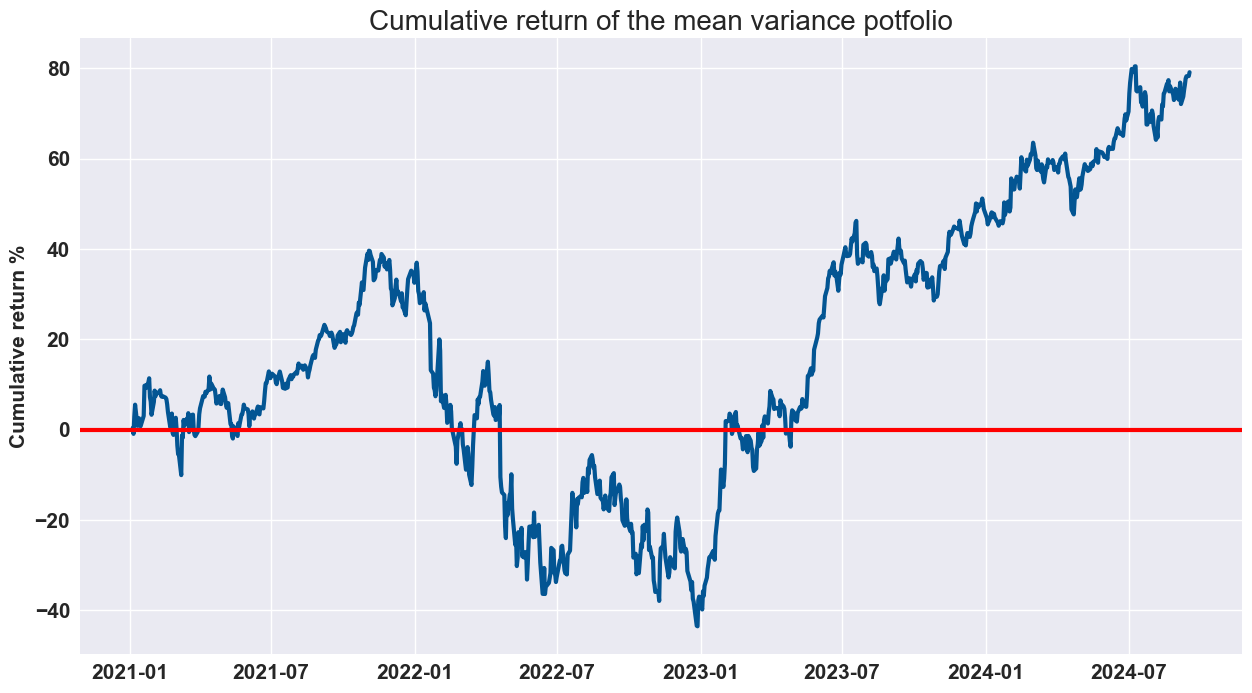

In [30]:
# Compute the cumulative return of the portfolio (CM)
portfolio_return_MV = np.multiply(test_set,np.transpose(X_MV))
portfolio_return_MV = portfolio_return_MV.sum(axis=1)

# Plot the CM
plt.figure(figsize=(15,8))
plt.plot(np.cumsum(portfolio_return_MV)*100, color="#035593", linewidth=3)
plt.ylabel("Cumulative return %", size=15, fontweight="bold")
plt.xticks(size=15,fontweight="bold")
plt.yticks(size=15,fontweight="bold")
plt.title("Cumulative return of the mean variance potfolio", size=20)
plt.axhline(0, color="r",linewidth=3)
plt.show()